In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
import importlib
from cycler import cycler
from matplotlib.ticker import MultipleLocator
from pathlib import Path
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 3\\utils.py'>

In [231]:
# Load data
# ------------------------------------------------------------------
# 1 · load the background once
# ------------------------------------------------------------------
bkg = utils.load_scan("Data/unk_18_bg.txt")          # rows = Mass values

data_dict = {}

path = 'Data/unk_18.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Unknown 18'] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Unknown 18"].head())

   Mass  Pressure (uncorrected)  Pressure (torr)
0   1.0            3.480000e-10     2.619000e-10
1   1.1            2.630000e-09     2.453000e-09
2   1.2            1.860000e-08     1.767500e-08
3   1.3            1.500000e-07     1.339000e-07
4   1.4            5.310000e-08     4.668000e-08


In [232]:
bkg = utils.load_scan("Data/unk_4_bg.txt")
path = 'Data/unk_4.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Unknown 4'] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Unknown 4"].head())

   Mass  Pressure (uncorrected)  Pressure (torr)
0   1.0            6.650000e-09     6.628100e-09
1   1.1            9.950000e-09     9.789000e-09
2   1.2            2.230000e-08     2.137300e-08
3   1.3            7.810000e-08     6.790000e-08
4   1.4            3.270000e-08     2.842000e-08


In [233]:
bkg = utils.load_scan("Data/cyclo_bg.txt")          # rows = Mass values

path = 'Data/Cyclo_data.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Cyclohexane'] = df.reset_index()   # back to columns if you prefer

In [234]:
for key, df in data_dict.items():
    df.drop(columns=['Pressure (uncorrected)'], inplace=True)
print(data_dict)

{'Unknown 18':        Mass  Pressure (torr)
0       1.0     2.619000e-10
1       1.1     2.453000e-09
2       1.2     1.767500e-08
3       1.3     1.339000e-07
4       1.4     4.668000e-08
5       1.5     1.666000e-08
6       1.6     8.060000e-09
7       1.7     3.710000e-09
8       1.8     1.400000e-09
9       1.9     1.000000e-10
10      2.0     4.000000e-09
11      2.1     1.420000e-08
12      2.2     1.400000e-08
13      2.3     1.550000e-08
14      2.4     3.160000e-09
15      2.5     0.000000e+00
16      2.6     0.000000e+00
17      2.7     0.000000e+00
18      2.8     0.000000e+00
19      2.9     0.000000e+00
20      3.0     0.000000e+00
21      3.1     0.000000e+00
22      3.2     0.000000e+00
23      3.3     0.000000e+00
24      3.4     0.000000e+00
25      3.5     0.000000e+00
26      3.6     0.000000e+00
27      3.7     0.000000e+00
28      3.8     0.000000e+00
29      3.9     0.000000e+00
30      4.0     0.000000e+00
31      4.1     0.000000e+00
32      4.2     0.000000e+00

In [235]:
max_value = 0
for key, data in data_dict.items():
    temp_max = data['Pressure (torr)'].max()
    if temp_max > max_value:
        max_value = temp_max

    intensity = data['Pressure (torr)'] / max_value * 100  # Normalize to percentage
    data_dict[key]['Intensity'] = intensity

In [236]:
# for key, data in data_dict.items():
#     intensity = data['Pressure (torr)'] / max_value * 100  # Normalize to percentage
#     data_dict[key]['Intensity'] = intensity

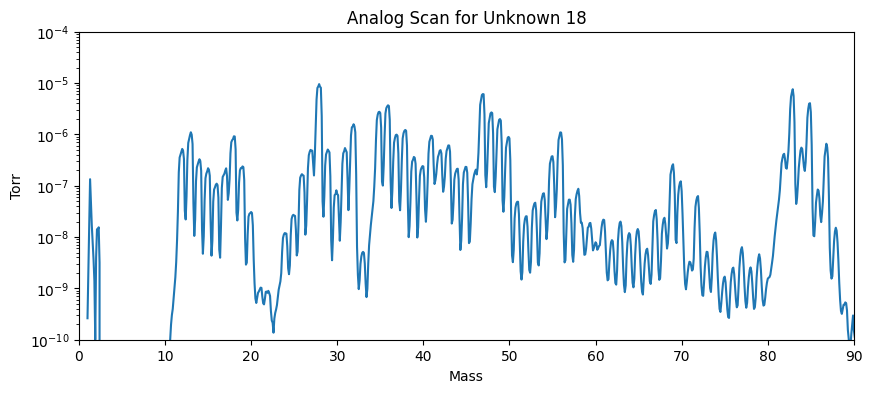

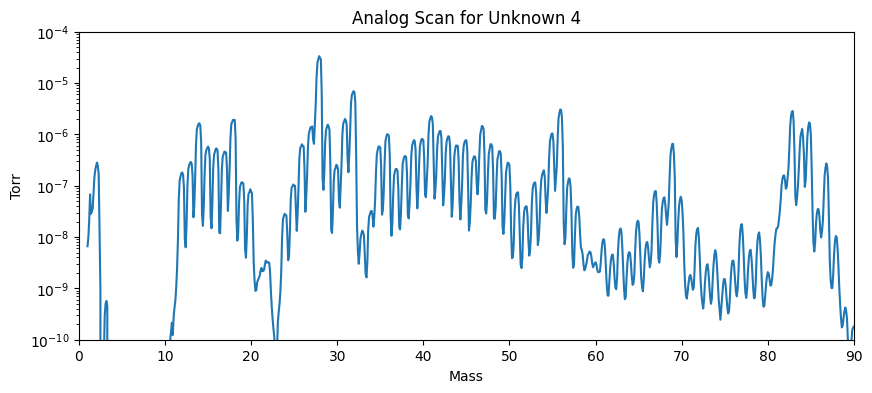

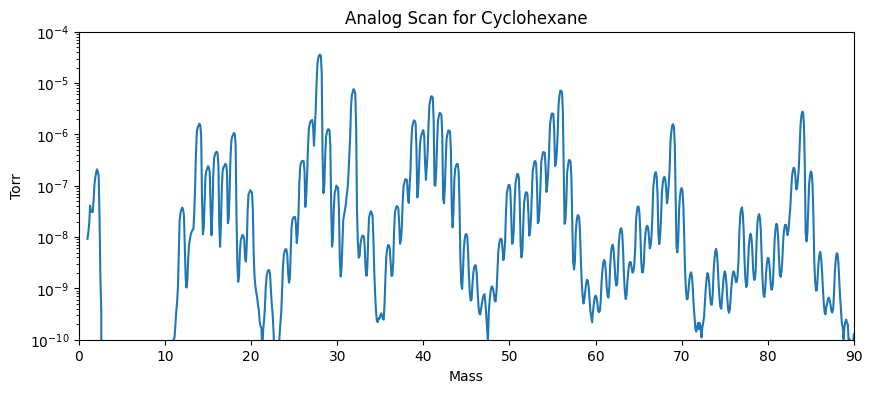

In [237]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
#     ax.axvline(x=2,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
#     ax.axvline(x=28,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
    ax.set_ylim(bottom=1e-10, top=1e-4)
    ax.set_xlim(0, 90)
    ax.set_yscale('log')
    ax.plot(data['Mass'], data['Pressure (torr)'])
    ax.set(xlabel='Mass', ylabel='Torr', title=f'Analog Scan for {key}')
    plt.show()
    

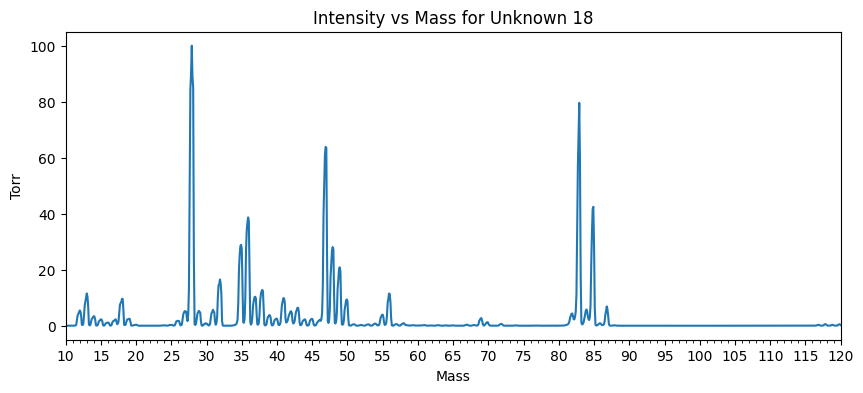

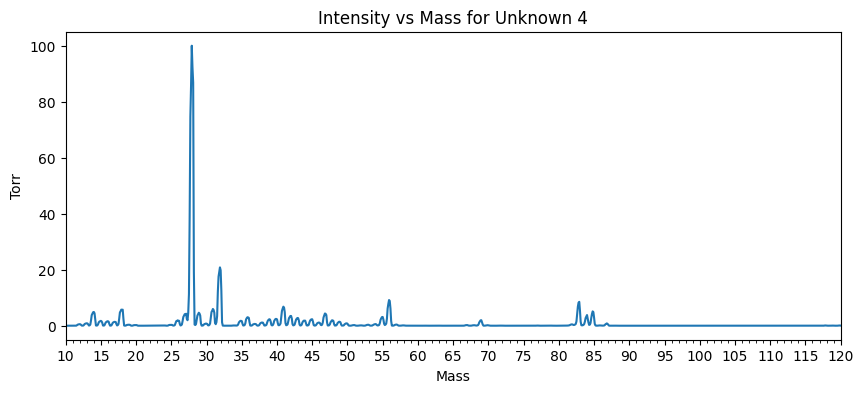

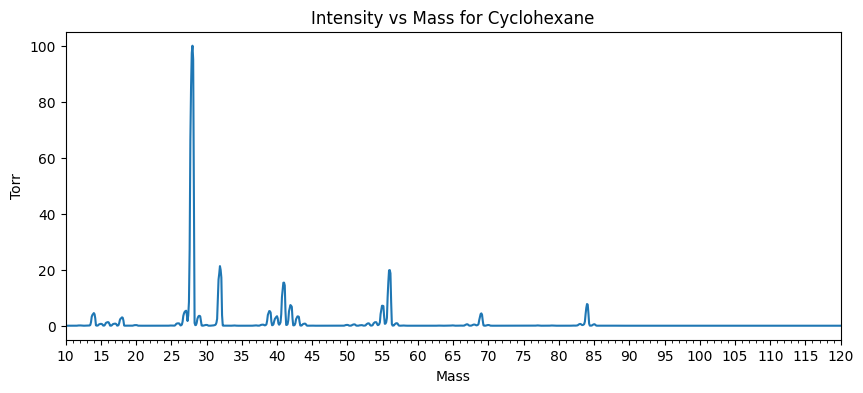

In [238]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(data['Mass'], data['Intensity'])
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    #    ax.axvline(x=2,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=28,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=42,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    ax.set_xlim(10, 120)
    ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for {key}')
    plt.show()
    

In [239]:
peaks_unk_4, peaks_mass_unk_4 = utils.find_peaks(data_dict['Unknown 4'], cutoff=5, interval=1.5)
peaks_unk_18, peaks_mass_unk_18 = utils.find_peaks(data_dict['Unknown 18'], cutoff=5, interval=1.5)

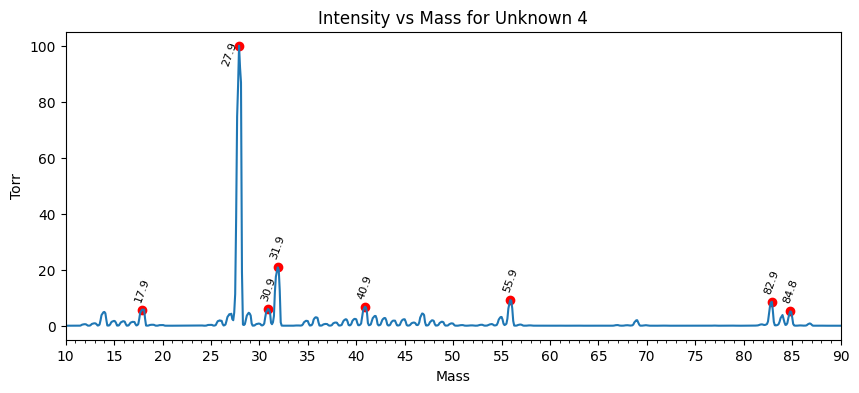

In [240]:

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_dict['Unknown 4']['Mass'], data_dict['Unknown 4']['Intensity'])
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.scatter(peaks_mass_unk_4, peaks_unk_4, color='red')
for m, I in zip(peaks_mass_unk_4, peaks_unk_4):
    if I < 80:
        ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                    xy=(m, I),           # point to annotate
                    xytext=(0, 5),       # (x-offset, y-offset) in points
                    textcoords='offset points',
                    ha='center',         # horizontal alignment
                    va='bottom',         # vertical alignment
                    fontsize=8,
                    rotation=70)         # slanted like your sample
    else:
            ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                xy=(m-1, I-10),           # point to annotate
                xytext=(0, 5),       # (x-offset, y-offset) in points
                textcoords='offset points',
                ha='center',         # horizontal alignment
                va='bottom',         # vertical alignment
                fontsize=8,
                rotation=70)         # slanted like your sample    
#    ax.axvline(x=2,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=28,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=42,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
ax.set_xlim(10, 90)
ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for Unknown 4')
plt.show()

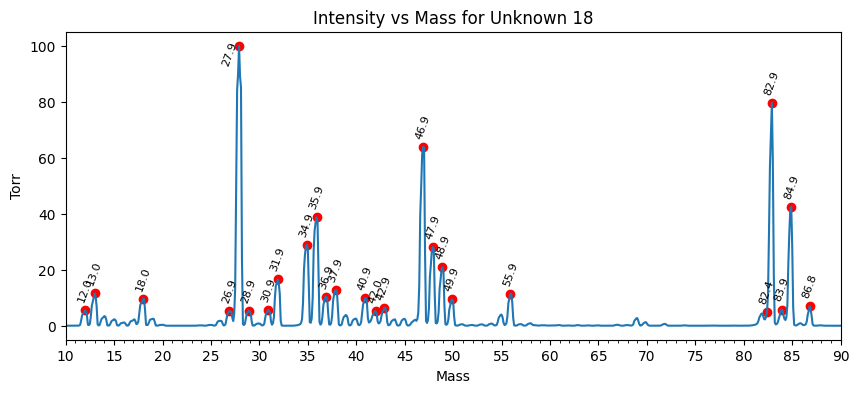

In [241]:

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_dict['Unknown 18']['Mass'], data_dict['Unknown 18']['Intensity'])
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.scatter(peaks_mass_unk_18, peaks_unk_18, color='red')
for m, I in zip(peaks_mass_unk_18, peaks_unk_18):
    if I < 80:
        ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                    xy=(m, I),           # point to annotate
                    xytext=(0, 5),       # (x-offset, y-offset) in points
                    textcoords='offset points',
                    ha='center',         # horizontal alignment
                    va='bottom',         # vertical alignment
                    fontsize=8,
                    rotation=70)         # slanted like your sample
    else:
            ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                xy=(m-1, I-10),           # point to annotate
                xytext=(0, 5),       # (x-offset, y-offset) in points
                textcoords='offset points',
                ha='center',         # horizontal alignment
                va='bottom',         # vertical alignment
                fontsize=8,
                rotation=70)         # slanted like your sample
#    ax.axvline(x=2,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=28,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=42,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
ax.set_xlim(10, 90)
ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for Unknown 18')
plt.show()

Mass vs Intensity tables

   Mass   Intensity
0  17.9    5.754836
1  27.9  100.000000
2  30.9    5.983322
3  31.9   20.843464
4  40.9    6.802803
5  55.9    9.172106
6  82.9    8.532008
7  84.8    5.119468


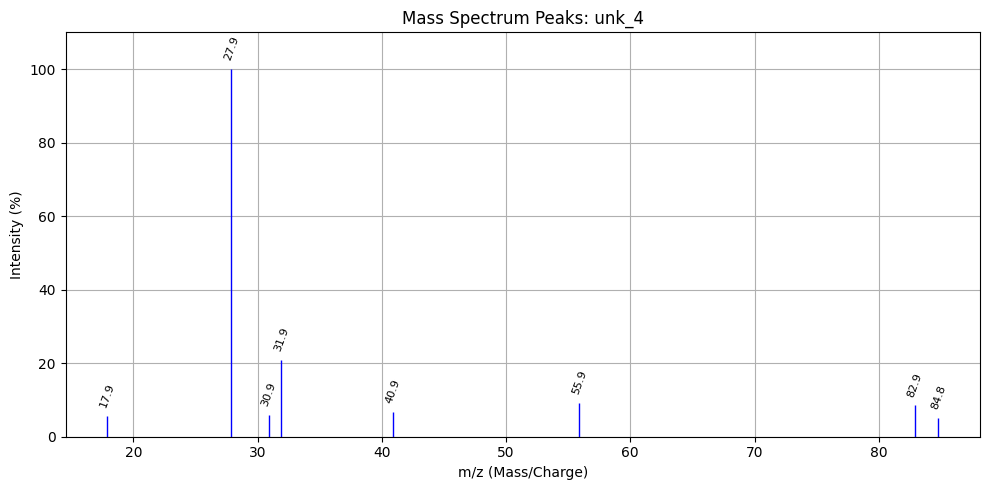

In [242]:
unk_4_peaks_df = pd.DataFrame({
    'Mass': peaks_mass_unk_4,
    'Intensity': peaks_unk_4
})
print(unk_4_peaks_df)

# Assume unk_4_peaks_df has columns "Mass" and "Intensity"
fig, ax = plt.subplots(figsize=(10, 5))

# Plot vertical lines
for _, row in unk_4_peaks_df.iterrows():
    ax.vlines(x=row["Mass"], ymin=0, ymax=row["Intensity"], color='blue', linewidth=1)

for m, I in zip(peaks_mass_unk_4, peaks_unk_4):
    ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
        xy=(m, I),           # point to annotate
        xytext=(0, 5),       # (x-offset, y-offset) in points
        textcoords='offset points',
        ha='center',         # horizontal alignment
        va='bottom',         # vertical alignment
        fontsize=8,
        rotation=70)         # slanted like your sample

# Customize plot
ax.set_xlabel("m/z (Mass/Charge)")
ax.set_ylabel("Intensity (%)")
ax.set_title("Mass Spectrum Peaks: unk_4")
ax.set_ylim(0, 110)  # Adjust if needed
ax.grid(True)

plt.tight_layout()
plt.show()


    Mass   Intensity
0   12.0    5.464023
1   13.0   11.530459
2   18.0    9.628697
3   26.9    5.231802
4   27.9  100.000000
5   28.9    5.317810
6   30.9    5.678309
7   31.9   16.519824
8   34.9   28.883784
9   35.9   38.683658
10  36.9   10.371722
11  37.9   12.788966
12  40.9    9.855255
13  42.0    5.174114
14  42.9    6.400357
15  46.9   63.869352
16  47.9   28.105423
17  48.9   20.868806
18  49.9    9.368513
19  55.9   11.488357
20  82.4    5.012471
21  82.9   79.597441
22  83.9    5.789595
23  84.9   42.471313
24  86.8    6.901190


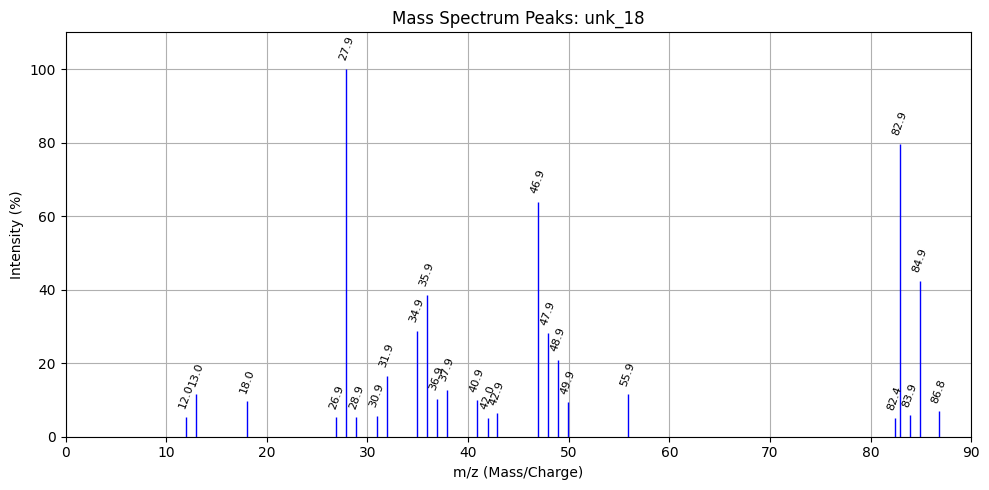

In [257]:
unk_18_peaks_df = pd.DataFrame({
    'Mass': peaks_mass_unk_18,
    'Intensity': peaks_unk_18
})
print(unk_18_peaks_df)

# Assume unk_4_peaks_df has columns "Mass" and "Intensity"
fig, ax = plt.subplots(figsize=(10, 5))

# Plot vertical lines
for _, row in unk_18_peaks_df.iterrows():
    ax.vlines(x=row["Mass"], ymin=0, ymax=row["Intensity"], color='blue', linewidth=1)

for m, I in zip(peaks_mass_unk_18, peaks_unk_18):
    ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
        xy=(m, I),           # point to annotate
        xytext=(0, 5),       # (x-offset, y-offset) in points
        textcoords='offset points',
        ha='center',         # horizontal alignment
        va='bottom',         # vertical alignment
        fontsize=8,
        rotation=70)         # slanted like your sample

# Customize plot
ax.set_xlabel("m/z (Mass/Charge)")
ax.set_ylabel("Intensity (%)")
ax.set_title("Mass Spectrum Peaks: unk_18")
ax.set_ylim(0, 110)  # Adjust if needed
ax.set_xlim(0, 90)
ax.grid(True)

plt.tight_layout()
plt.show()


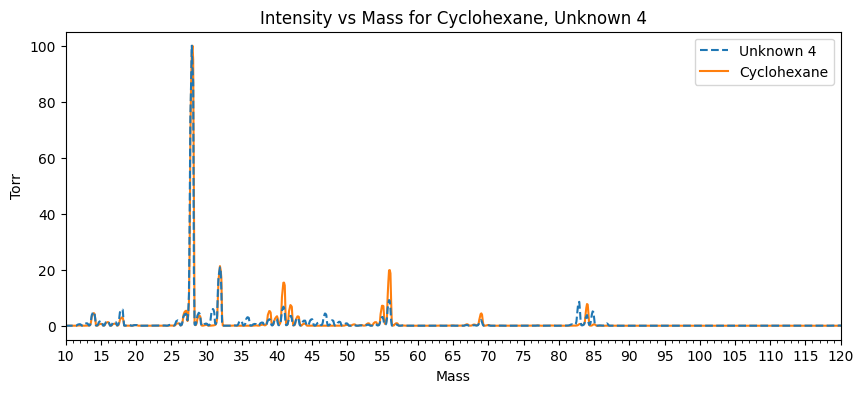

In [244]:

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_dict['Unknown 4']['Mass'], data_dict['Unknown 4']['Intensity'], '--', label='Unknown 4', zorder=2)
ax.plot(data_dict['Cyclohexane']['Mass'], data_dict['Cyclohexane']['Intensity'], label='Cyclohexane', zorder=1)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend()
#    ax.axvline(x=2,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=28,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=42,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
ax.set_xlim(10, 120)
ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for Cyclohexane, Unknown 4')
plt.show()

In [245]:
peaks_cyc, peaks_mass_cyc = utils.find_peaks(data_dict['Cyclohexane'], cutoff=5, interval=1.5)

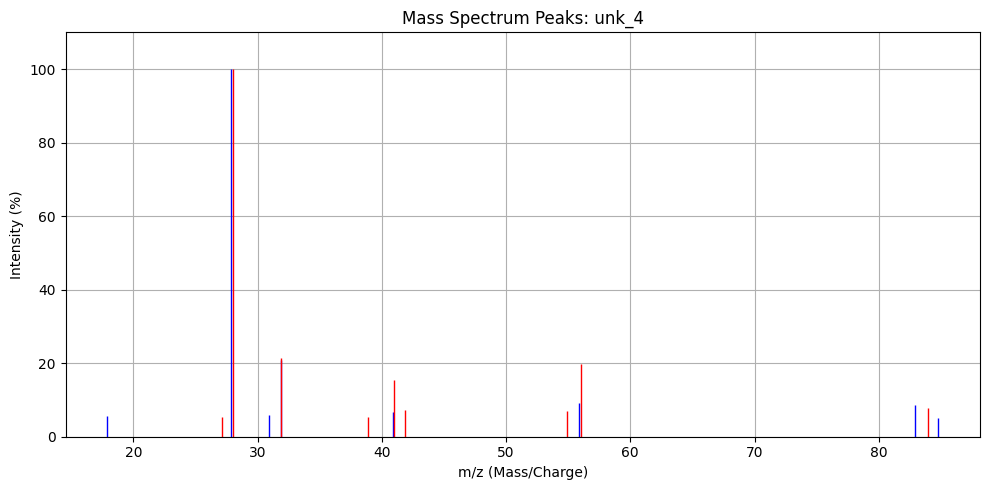

In [246]:
cyc_peaks_df = pd.DataFrame({
    'Mass': peaks_mass_cyc,
    'Intensity': peaks_cyc
})
# print(cyc_peaks_df)

# Assume unk_4_peaks_df has columns "Mass" and "Intensity"
fig, ax = plt.subplots(figsize=(10, 5))

# Plot vertical lines
for _, row in unk_4_peaks_df.iterrows():
    ax.vlines(x=row["Mass"], ymin=0, ymax=row["Intensity"], color='blue', linewidth=1)

# for m, I in zip(peaks_mass_unk_4, peaks_unk_4):
#     ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
#         xy=(m, I),           # point to annotate
#         xytext=(0, 5),       # (x-offset, y-offset) in points
#         textcoords='offset points',
#         ha='center',         # horizontal alignment
#         va='bottom',         # vertical alignment
#         fontsize=8,
#         rotation=70)         # slanted like your sample

for _, row in cyc_peaks_df.iterrows():
    ax.vlines(x=row["Mass"], ymin=0, ymax=row["Intensity"], color='red', linewidth=1)

# for m, I in zip(peaks_mass_unk_4, peaks_unk_4):
#     ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
#         xy=(m, I),           # point to annotate
#         xytext=(0, 5),       # (x-offset, y-offset) in points
#         textcoords='offset points',
#         ha='center',         # horizontal alignment
#         va='bottom',         # vertical alignment
#         fontsize=8,
#         rotation=70)         # slanted like your sample

# Customize plot
ax.set_xlabel("m/z (Mass/Charge)")
ax.set_ylabel("Intensity (%)")
ax.set_title("Mass Spectrum Peaks: unk_4")
ax.set_ylim(0, 110)  # Adjust if needed
ax.grid(True)

plt.tight_layout()
plt.show()


In [252]:
data_dict_truncated = {}
for key in data_dict:
    data_dict_truncated[key] = data_dict[key][data_dict[key]['Mass'] >= 30].reset_index(drop=True)
    data_dict_truncated[key]['Intensity'] = data_dict_truncated[key]['Intensity'] / data_dict_truncated[key]['Intensity'].max() * 100

In [255]:
peaks_unk_4_truncated, peaks_mass_unk_4_truncated = utils.find_peaks(data_dict_truncated['Unknown 4'], cutoff=20, interval=1.5)
peaks_unk_18_truncated, peaks_mass_unk_18_truncated = utils.find_peaks(data_dict_truncated['Unknown 18'], cutoff=5, interval=1.5)

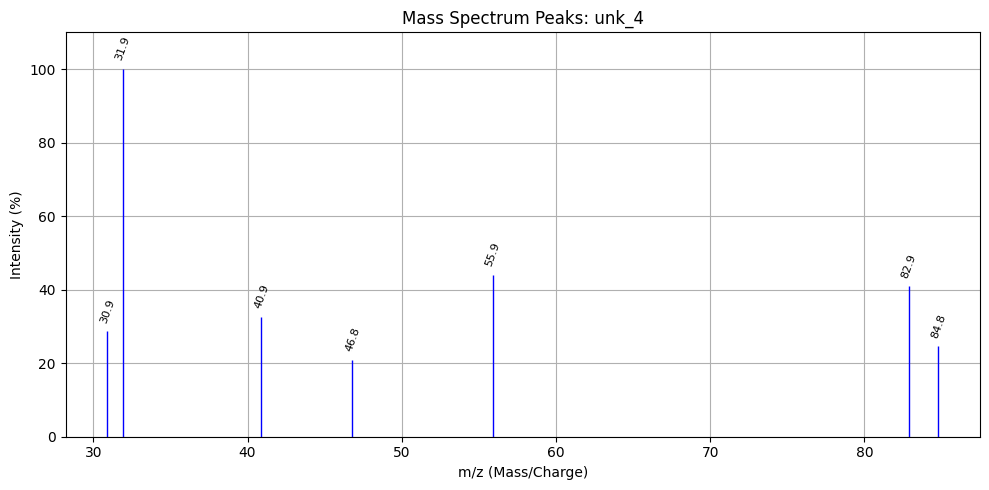

In [256]:
unk_4_peaks_truncated_df = pd.DataFrame({
    'Mass': peaks_mass_unk_4_truncated,
    'Intensity': peaks_unk_4_truncated
})
#print(unk_4_peaks_truncated_df)

# Assume unk_4_peaks_truncated_df has columns "Mass" and "Intensity"
fig, ax = plt.subplots(figsize=(10, 5))

# Plot vertical lines
for _, row in unk_4_peaks_truncated_df.iterrows():
    ax.vlines(x=row["Mass"], ymin=0, ymax=row["Intensity"], color='blue', linewidth=1)

for m, I in zip(peaks_mass_unk_4_truncated, peaks_unk_4_truncated):
    ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
        xy=(m, I),           # point to annotate
        xytext=(0, 5),       # (x-offset, y-offset) in points
        textcoords='offset points',
        ha='center',         # horizontal alignment
        va='bottom',         # vertical alignment
        fontsize=8,
        rotation=70)         # slanted like your sample

# Customize plot
ax.set_xlabel("m/z (Mass/Charge)")
ax.set_ylabel("Intensity (%)")
ax.set_title("Mass Spectrum Peaks: unk_4")
ax.set_ylim(0, 110)  # Adjust if needed
ax.grid(True)

plt.tight_layout()
plt.show()
